**Prediction-of-Pediatric-Pneumonia-in-Chest-X-Rays-using Deep-Learning**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


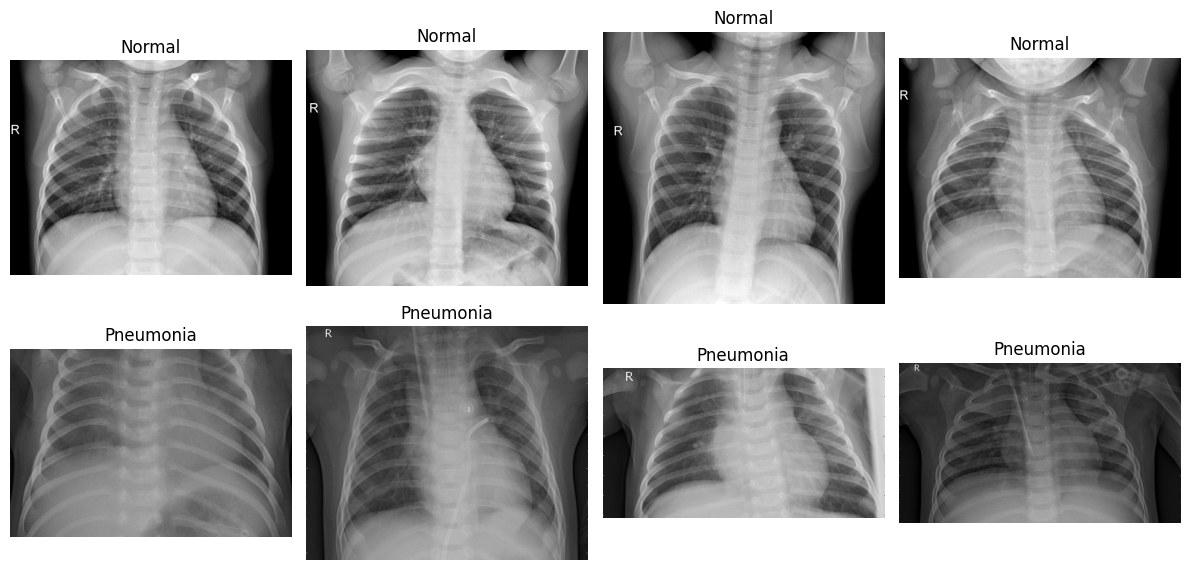

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

# Set the directory for the training data
train_normal_dir = '/content/drive/MyDrive/DLData/train/NORMAL/'
train_pneumonia_dir = '/content/drive/MyDrive/DLData/train/PNEUMONIA/'

# Get list of filenames for normal and pneumonia images
train_normal_fnames = os.listdir(train_normal_dir)
train_pneumonia_fnames = os.listdir(train_pneumonia_dir)

# Number of images to display for each category
num_images = 4

fig = plt.figure(figsize=(12, 6))

# Display 'Normal' images
for i in range(num_images):
    sp = plt.subplot(2, num_images, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)
    img_path = train_normal_dir + train_normal_fnames[i]
    img = mpimg.imread(img_path)
    sp.set_title('Normal', fontsize=12)
    plt.imshow(img, cmap='gray')

# Display 'Pneumonia' images
for i in range(num_images):
    sp = plt.subplot(2, num_images, num_images + i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)
    img_path = train_pneumonia_dir + train_pneumonia_fnames[i]
    img = mpimg.imread(img_path)
    sp.set_title('Pneumonia', fontsize=12)
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
cnn_model = Sequential()

# Adjust the input shape based on your images (RGB or grayscale)
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
# First convolutional layer
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

# Flatten the output
cnn_model.add(Flatten())

# Add a dense layer with a feasible number of neurons (adjust as necessary)
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))

# Output layer
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check the model summary
cnn_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 64)       

In [ ]:
history_cnn = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
167/167 [==============================] - 105s 614ms/step - loss: 0.3827 - accuracy: 0.8371 - val_loss: 0.3984 - val_accuracy: 0.8234
Epoch 2/10
167/167 [==============================] - 101s 603ms/step - loss: 0.2653 - accuracy: 0.8886 - val_loss: 0.4373 - val_accuracy: 0.8219
Epoch 3/10
167/167 [==============================] - 101s 604ms/step - loss: 0.2013 - accuracy: 0.9165 - val_loss: 0.3445 - val_accuracy: 0.8687
Epoch 4/10
167/167 [==============================] - 102s 611ms/step - loss: 0.1964 - accuracy: 0.9257 - val_loss: 0.3467 - val_accuracy: 0.8562
Epoch 5/10
167/167 [==============================] - 104s 620ms/step - loss: 0.1709 - accuracy: 0.9339 - val_loss: 0.3764 - val_accuracy: 0.8672
Epoch 6/10
167/167 [==============================] - 103s 618ms/step - loss: 0.1512 - accuracy: 0.9423 - val_loss: 0.5842 - val_accuracy: 0.8172
Epoch 7/10
167/167 [==============================] - 103s 619ms/step - loss: 0.1474 - accuracy: 0.9442 - val_loss: 0.2872 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



21/21 [==============================] - 6s 248ms/step - loss: 0.3258 - accuracy: 0.8954
Test Accuracy: 89.54%


1/1 [==============================] - 0s 100ms/step


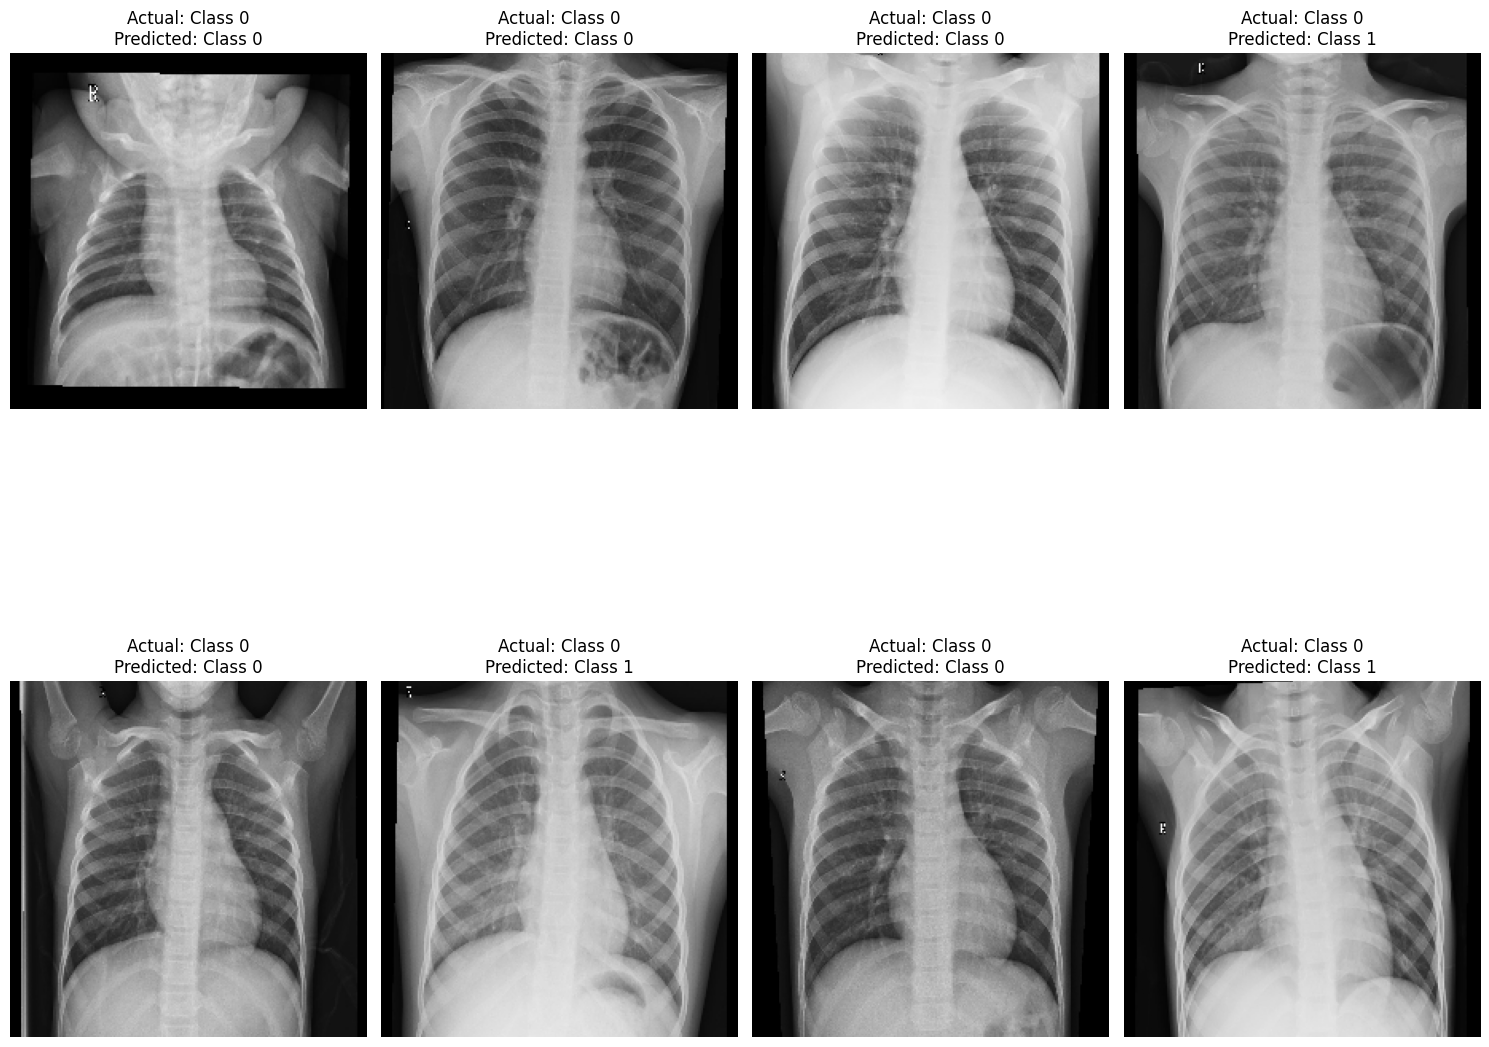

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels
test_images, test_labels = next(test_generator)

# Predict using the CNN model
predictions = cnn_model.predict(test_images)

# Convert predictions to binary labels (assuming binary classification)
predicted_labels = (predictions > 0.5).astype(int)

# Number of images to display
num_images = 8

plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])

    # True and predicted labels
    actual_label = int(test_labels[i])
    predicted_label = int(predicted_labels[i])

    plt.title(f'Actual: Class {actual_label}\nPredicted: Class {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


**DenseNet 121**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/DLData/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/DLData/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build the model
base_model = DenseNet121(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



Found 5374 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
168/168 [==============================] - 115s 633ms/step - loss: 0.2534 - accuracy: 0.8999 - val_loss: 0.3115 - val_accuracy: 0.8692
Epoch 2/10
168/168 [==============================] - 104s 618ms/step - loss: 0.1463 - accuracy: 0.9414 - val_loss: 0.3655 - val_accuracy: 0.8585
Epoch 3/10
168/168 [==============================] - 103s 612ms/step - loss: 0.1282 - accuracy: 0.9540 - val_loss: 0.3532 - val_accuracy: 0.8738
Epoch 4/10
168/168 [==============================] - 103s 612ms/step - loss: 0.1240 - accuracy: 0.9544 - val_loss: 0.2479 - val_accuracy: 0.8923
Epoch 5/10
168/168 [==============================] - 105s 624ms/step - loss: 0.1137 - accuracy: 0.9581 - val_loss: 0.2403 - val_accuracy: 0.9000
Epoch 6/10
168/168 [==============================] - 105s 624ms/step - loss: 0.1204 - accuracy: 0.9522 - val_loss: 0.2789 - val_accuracy: 0.9077
Epoch 7/10
168/168 [==============================] - 106s 631ms/step - loss: 0.1240 - accuracy: 0.9496 - val_loss: 0.4274 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


21/21 [==============================] - 5s 235ms/step - loss: 0.3666 - accuracy: 0.8831
Test Accuracy: 88.31%


**Optimising the above model by Fine tuning last few layers,introducing the LR Scheduler and Adding Dropout**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import LearningRateScheduler

def build_optimized_model():
    # Build the model
    base_model = DenseNet121(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Add dropout for regularization
    predictions = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Fine-tune the last few layers of the base model
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    # Learning rate scheduling
    def lr_scheduler(epoch, lr):
        if epoch % 5 == 0 and epoch > 0:
            return lr * 0.8  # Adjust the learning if needed for testing other lr
        return lr

    lr_schedule = LearningRateScheduler(lr_scheduler)

    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model, lr_schedule

# Build the optimized model and learning rate scheduler
optimized_model, lr_schedule = build_optimized_model()

# Train the model with learning rate scheduling
history = optimized_model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[lr_schedule])


Epoch 1/10
168/168 [==============================] - 117s 640ms/step - loss: 0.1861 - accuracy: 0.9297 - val_loss: 0.7723 - val_accuracy: 0.8138 - lr: 0.0010
Epoch 2/10
168/168 [==============================] - 104s 618ms/step - loss: 0.1141 - accuracy: 0.9602 - val_loss: 0.2780 - val_accuracy: 0.9277 - lr: 0.0010
Epoch 3/10
168/168 [==============================] - 103s 615ms/step - loss: 0.0939 - accuracy: 0.9659 - val_loss: 0.1795 - val_accuracy: 0.9354 - lr: 0.0010
Epoch 4/10
168/168 [==============================] - 104s 617ms/step - loss: 0.0887 - accuracy: 0.9676 - val_loss: 0.3789 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 5/10
168/168 [==============================] - 102s 606ms/step - loss: 0.0737 - accuracy: 0.9753 - val_loss: 0.4077 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 6/10
168/168 [==============================] - 105s 624ms/step - loss: 0.0636 - accuracy: 0.9771 - val_loss: 0.6057 - val_accuracy: 0.8523 - lr: 8.0000e-04
Epoch 7/10
168/168 [======================

In [ ]:
# Evaluate the model
test_loss, test_acc = optimized_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

21/21 [==============================] - 6s 242ms/step - loss: 0.2388 - accuracy: 0.9431
Test Accuracy: 94.31%


Displaying the images with original and predicted value

1/1 [==============================] - 0s 44ms/step


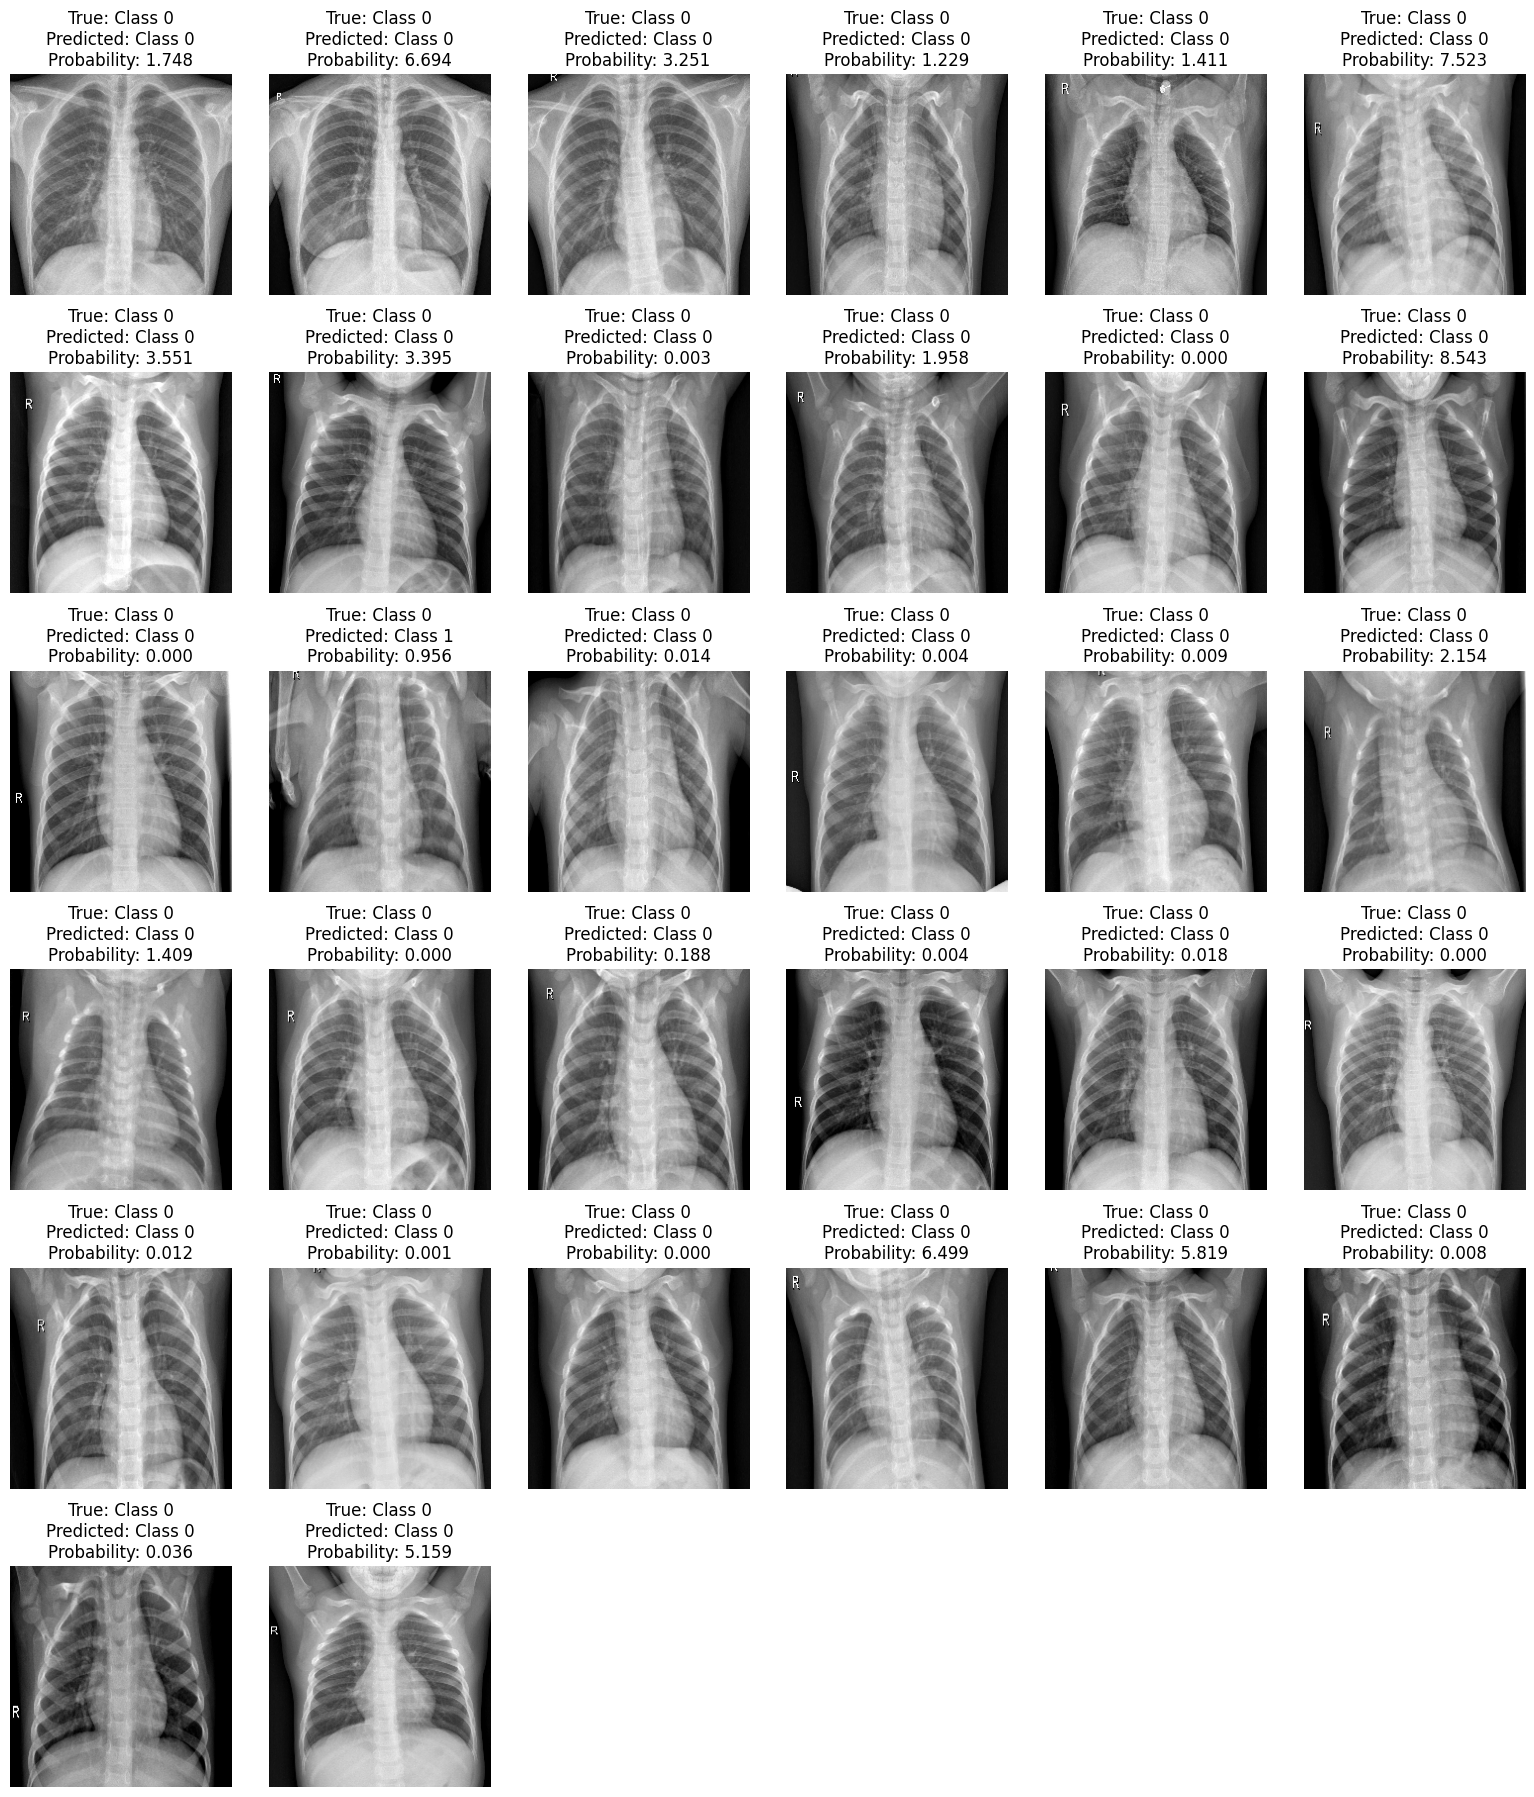

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test images and labels
test_images, test_labels = next(iter(test_generator))

# Predict using the optimized model
predictions = optimized_model.predict(test_images)

# Convert predicted probabilities to class labels
# Assuming binary classification
predicted_labels = (predictions > 0.5).astype(int)

# Visualize images with true label, predicted label, and probability
plt.figure(figsize=(20, 30))
n_rows = 8
n_cols = 6

for i in range(min(n_rows * n_cols, test_images.shape[0])):
    # True label text
    text_true = 'True: ' + ('Class 1' if test_labels[i] == 1 else 'Class 0')

    # Predicted label text
    text_pred = '\nPredicted: ' + ('Class 1' if predicted_labels[i][0] == 1 else 'Class 0')

    # Probability text
    text_prob = '\nProbability: ' + str(predictions[i][0])[:5]

    # Plot the image
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(text_true + text_pred + text_prob)
    plt.axis('off')

plt.subplots_adjust(wspace=.01, hspace=.35)
plt.show()


**Densenet 201**

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam



# Build the DenseNet201 model
base_model_201 = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model_201.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_201 = Model(inputs=base_model_201.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model_201.layers:
    layer.trainable = False

# Compile the model
model_201.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history_201 = model_201.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
167/167 [==============================] - 119s 647ms/step - loss: 0.1858 - accuracy: 0.9268 - val_loss: 0.3527 - val_accuracy: 0.8516
Epoch 2/10
167/167 [==============================] - 106s 634ms/step - loss: 0.1477 - accuracy: 0.9418 - val_loss: 0.3495 - val_accuracy: 0.8547
Epoch 3/10
167/167 [==============================] - 104s 622ms/step - loss: 0.1136 - accuracy: 0.9568 - val_loss: 0.2955 - val_accuracy: 0.8875
Epoch 4/10
167/167 [==============================] - 103s 616ms/step - loss: 0.1180 - accuracy: 0.9560 - val_loss: 0.2739 - val_accuracy: 0.8953
Epoch 5/10
167/167 [==============================] - 104s 621ms/step - loss: 0.0954 - accuracy: 0.9629 - val_loss: 0.2351 - val_accuracy: 0.9109
Epoch 6/10
167/167 [==============================] - 106s 634ms/step - loss: 0.0884 - accuracy: 0.9684 - val_loss: 0.2853 - val_accuracy: 0.8938
Epoch 7/10
167/167 [==============================] - 105s 626ms/step - loss: 0.0797 - accuracy: 0.9684 - val_loss: 0.2511 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_201.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


21/21 [==============================] - 6s 276ms/step - loss: 0.1967 - accuracy: 0.9308
Test Accuracy: 93.08%


**Optimised DenseNet201 with fine-tuning few layers , dynamic learning rate adjustments, and advanced training callbacks**

In [ ]:
# Build the DenseNet201 model
base_densenet_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_densenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

optimized_model_201 = Model(inputs=base_densenet_model.input, outputs=predictions)

# Fine-tune the last few layers of the base model
for layer in base_densenet_model.layers[:-10]:
    layer.trainable = False

# Compile the model
optimized_model_201.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Callbacks

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K


def learning_rate_scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        lr *= 0.5
    return lr

lr_callback = LearningRateScheduler(learning_rate_scheduler)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


In [ ]:
# Train the model
history_201 = optimized_model_201.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    callbacks=[lr_callback, early_stopping, model_checkpoint],
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
167/167 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.9214

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


167/167 [==============================] - 121s 656ms/step - loss: 0.2157 - accuracy: 0.9214 - val_loss: 0.1866 - val_accuracy: 0.9328 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - 104s 623ms/step - loss: 0.0976 - accuracy: 0.9624 - val_loss: 0.2750 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - 105s 626ms/step - loss: 0.0728 - accuracy: 0.9740 - val_loss: 0.1828 - val_accuracy: 0.9328 - lr: 0.0010
Epoch 4/10
167/167 [==============================] - 106s 633ms/step - loss: 0.0716 - accuracy: 0.9744 - val_loss: 0.1675 - val_accuracy: 0.9406 - lr: 0.0010
Epoch 5/10
167/167 [==============================] - 105s 628ms/step - loss: 0.0580 - accuracy: 0.9785 - val_loss: 0.3120 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 6/10
167/167 [==============================] - 104s 622ms/step - loss: 0.0414 - accuracy: 0.9850 - val_loss: 0.3492 - val_accuracy: 0.9078 - lr: 5.0000e-04
Epoch 7/10
167/167 [==============================] -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = optimized_model_201.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


21/21 [==============================] - 6s 249ms/step - loss: 0.1650 - accuracy: 0.9415
Test Accuracy: 94.15%


1/1 [==============================] - 3s 3s/step


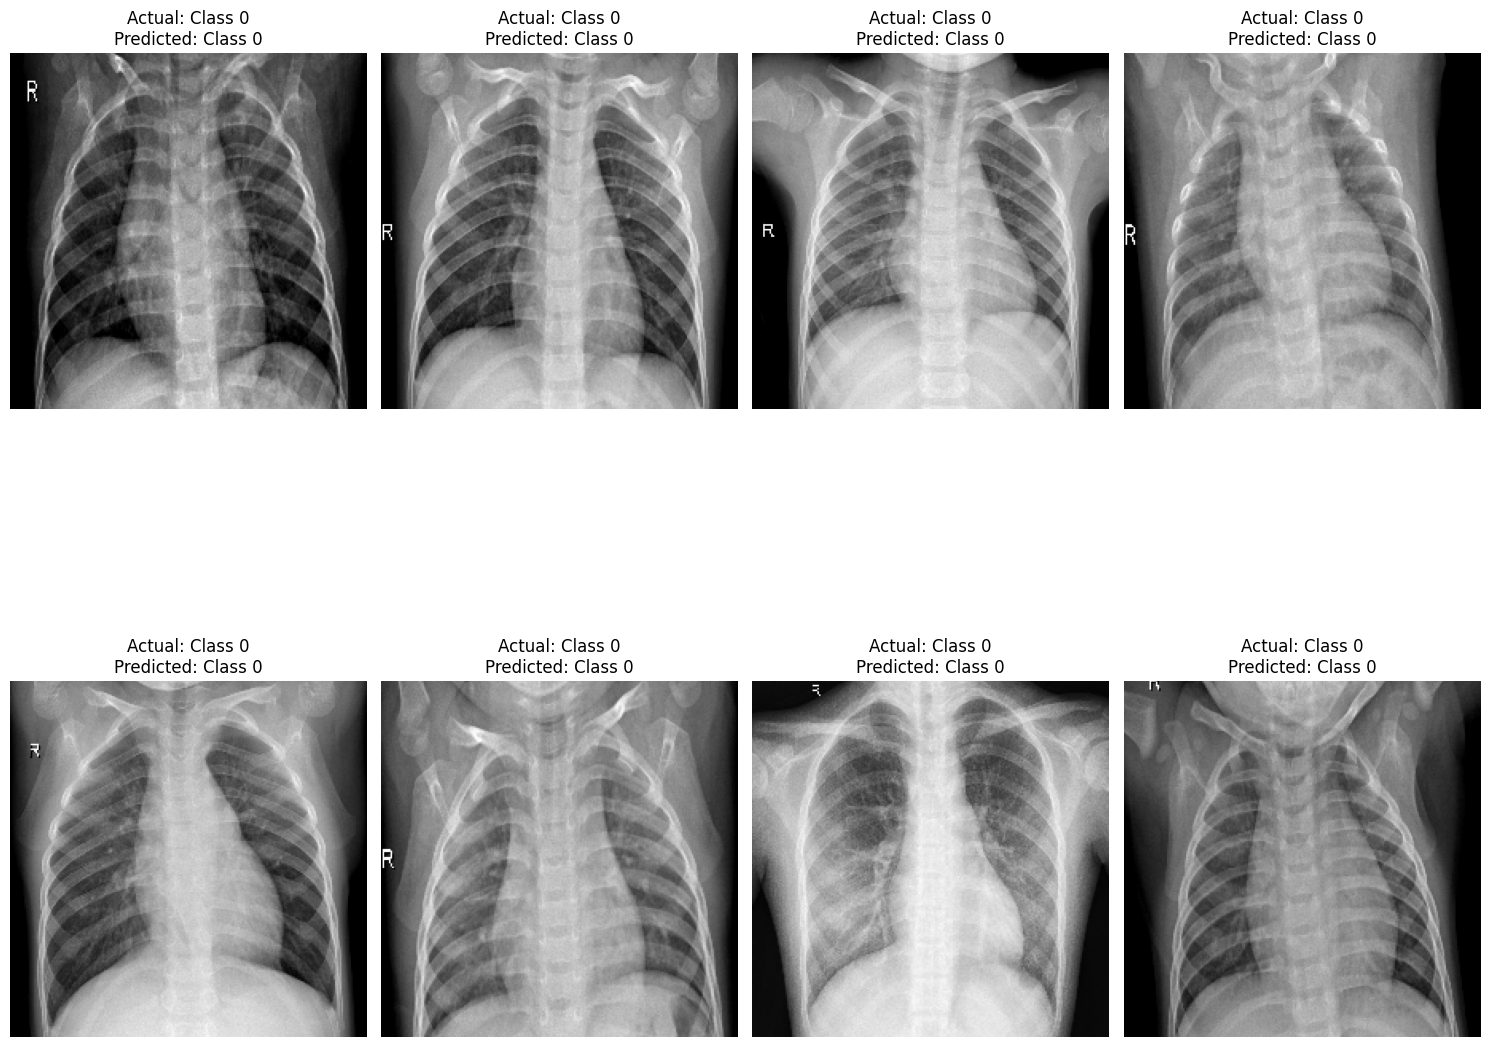

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the test set
test_images, test_labels = next(iter(test_generator))

# Make predictions using the DenseNet201 model
predictions = optimized_model_201.predict(test_images)

# Convert predictions to binary labels (assuming binary classification)
predicted_labels = (predictions > 0.5).astype(int)

# Number of images to display
num_images = 8

plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])

    # Actual and predicted labels
    actual_label = int(test_labels[i])
    predicted_label = int(predicted_labels[i])

    plt.title(f'Actual: Class {actual_label}\nPredicted: Class {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


**VGG16**

In [ ]:
# Load the pre-trained VGG16 model
base_vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Flatten the output of the VGG16 model
x = Flatten()(base_vgg16_model.output)

# Add Dense and Dropout layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer for regularization

# Add output layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
vgg16_model = Model(inputs=base_vgg16_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model
for layer in base_vgg16_model.layers:
    layer.trainable = False


In [ ]:
vgg16_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('vgg16_best_model.h5', save_best_only=True, monitor='val_accuracy')


In [ ]:
history = vgg16_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
168/168 [==============================] - 108s 628ms/step - loss: 0.4617 - accuracy: 0.9038 - val_loss: 0.2664 - val_accuracy: 0.9062
Epoch 2/10
168/168 [==============================] - 105s 626ms/step - loss: 0.1523 - accuracy: 0.9427 - val_loss: 0.2965 - val_accuracy: 0.9092
Epoch 3/10
168/168 [==============================] - 104s 621ms/step - loss: 0.1380 - accuracy: 0.9423 - val_loss: 0.2332 - val_accuracy: 0.9185
Epoch 4/10
168/168 [==============================] - 103s 613ms/step - loss: 0.1261 - accuracy: 0.9529 - val_loss: 0.2498 - val_accuracy: 0.9169
Epoch 5/10
168/168 [==============================] - 105s 626ms/step - loss: 0.1293 - accuracy: 0.9485 - val_loss: 0.2143 - val_accuracy: 0.9231
Epoch 6/10
168/168 [==============================] - 102s 609ms/step - loss: 0.1153 - accuracy: 0.9568 - val_loss: 0.2571 - val_accuracy: 0.9138
Epoch 7/10
168/168 [==============================] - 103s 615ms/step - loss: 0.1144 - accuracy: 0.9576 - val_loss: 0.3255 -

In [ ]:
test_loss, test_accuracy = vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


21/21 [==============================] - 5s 234ms/step - loss: 0.2143 - accuracy: 0.9231
Test Accuracy: 92.31%
